<a href="https://colab.research.google.com/github/Digx1/langgraph-notes/blob/main/module-2/filter_%26_trimming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture --no-stderr
%pip install --quiet -U langchain_core langgraph langchain_openai

In [2]:
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("OPENAI_API_KEY")

OPENAI_API_KEY: ··········


In [3]:
_set_env("LANGCHAIN_API_KEY")
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "langchain-academy"

LANGCHAIN_API_KEY: ··········


In [4]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage
messages = [AIMessage(f"So you said you were researching ocean mammals?", name="chatbot")]
messages.append(HumanMessage(f"Yes, I know about whales. But what others should I learn about?", name="digvijay"))

for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: chatbot

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: digvijay

Yes, I know about whales. But what others should I learn about?


In [5]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4o")
llm.invoke(messages)

AIMessage(content='In addition to whales, there are several fascinating marine mammals that you might find interesting to study:\n\n1. **Dolphins**: Highly intelligent and social creatures, dolphins are known for their playful behavior and strong social bonds within pods.\n\n2. **Porpoises**: Similar to dolphins but generally smaller, porpoises are distinguished by their more rounded bodies and less pronounced beaks.\n\n3. **Seals**: These semi-aquatic marine mammals are known for their playful and curious nature. There are many species, including the harbor seal and elephant seal.\n\n4. **Sea Lions**: Related to seals, sea lions are known for their external ear flaps and their ability to "walk" on land using their large flippers.\n\n5. **Walruses**: Recognizable by their long tusks and whiskers, walruses are social animals that spend large amounts of time on ice.\n\n6. **Manatees and Dugongs**: Sometimes called "sea cows," these gentle, slow-moving mammals graze on aquatic vegetation 

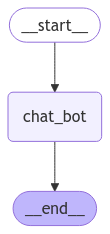

In [9]:
from IPython.display import Image, display
from langgraph.graph import MessagesState
from langgraph.graph import StateGraph, START, END

# Node
def chat_model_node(state: MessagesState):
    return {"messages": llm.invoke(state["messages"])}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("chat_bot", chat_model_node)
builder.add_edge(START, "chat_bot")
builder.add_edge("chat_bot", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [10]:
output = graph.invoke({'messages': messages})
for m in output['messages']:
    m.pretty_print()


================================== Ai Message ==================================
Name: chatbot

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: digvijay

Yes, I know about whales. But what others should I learn about?
================================== Ai Message ==================================

In addition to whales, there are several fascinating ocean mammals you might want to explore:

1. **Dolphins**: Known for their intelligence and playful behavior, dolphins are part of the family Delphinidae. They communicate using a variety of clicks, whistle-like sounds, and other vocalizations.

2. **Porpoises**: Similar to dolphins but generally shorter and stouter, porpoises are part of the family Phocoenidae. They have a more triangular dorsal fin compared to the curved fin of dolphins.

3. **Seals**: Members of the pinniped group, seals have varying adaptations for life in cold waters. Examples inclu

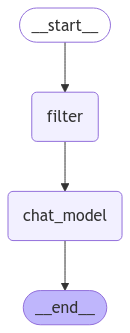

In [23]:
from langchain_core.messages import RemoveMessage

# Nodes
def filter_messages(state: MessagesState):
    # Delete all but the 2 most recent messages
    delete_messages = [RemoveMessage(id=m.id) for m in state["messages"][:-2]]
    return {"messages": delete_messages}

def chat_model_node(state: MessagesState):
    return {"messages": [llm.invoke(state["messages"])]}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("filter", filter_messages)
builder.add_node("chat_model", chat_model_node)
builder.add_edge(START, "filter")
builder.add_edge("filter", "chat_model")
builder.add_edge("chat_model", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [24]:
# Message list with a preamble
messages = [AIMessage("Hi.", name="chat_bot", id="1")]
messages.append(HumanMessage("Hi.", name="digvijay", id="2"))
messages.append(AIMessage("So you said you were researching ocean mammals?", name="chat_bot", id="3"))
messages.append(HumanMessage("Yes, I know about whales. But what others should I learn about?", name="digvijay", id="4"))

# Invoke
output = graph.invoke({'messages': messages})
for m in output['messages']:
    m.pretty_print()

================================== Ai Message ==================================
Name: chat_bot

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: digvijay

Yes, I know about whales. But what others should I learn about?
================================== Ai Message ==================================

In addition to whales, there are several fascinating ocean mammals you might want to explore:

1. **Dolphins**: Known for their intelligence and social behavior, dolphins are part of the Cetacea order, like whales. Common species include bottlenose dolphins and orcas (killer whales, which are actually dolphins).

2. **Porpoises**: Similar to dolphins, porpoises are smaller and have different dental structures. The harbor porpoise is a well-known species.

3. **Seals**: These pinnipeds are divided into two families: earless seals (true seals) and eared seals (which include sea lions and fur seals). Species

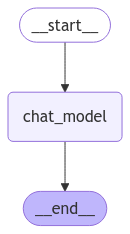

In [25]:
# Node
def chat_model_node(state: MessagesState):
    return {"messages": [llm.invoke(state["messages"][-1:])]}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("chat_model", chat_model_node)
builder.add_edge(START, "chat_model")
builder.add_edge("chat_model", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [30]:
messages.append(output['messages'][-1])
messages.append(HumanMessage(f"okey,thak you.", name="digvijay"))

In [31]:
for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: chat_bot

Hi.
================================ Human Message =================================
Name: digvijay

Hi.
================================== Ai Message ==================================
Name: chat_bot

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: digvijay

Yes, I know about whales. But what others should I learn about?
================================== Ai Message ==================================

In addition to whales, there are several fascinating ocean mammals you might want to explore:

1. **Dolphins**: Known for their intelligence and social behavior, dolphins are part of the Cetacea order, like whales. Common species include bottlenose dolphins and orcas (killer whales, which are actually dolphins).

2. **Porpoises**: Similar to dolphins, porpoises are smaller and have different dental structur

In [32]:
# Invoke, using message filtering
output = graph.invoke({'messages': messages})
for m in output['messages']:
    m.pretty_print()

================================== Ai Message ==================================
Name: chat_bot

Hi.
================================ Human Message =================================
Name: digvijay

Hi.
================================== Ai Message ==================================
Name: chat_bot

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: digvijay

Yes, I know about whales. But what others should I learn about?
================================== Ai Message ==================================

In addition to whales, there are several fascinating ocean mammals you might want to explore:

1. **Dolphins**: Known for their intelligence and social behavior, dolphins are part of the Cetacea order, like whales. Common species include bottlenose dolphins and orcas (killer whales, which are actually dolphins).

2. **Porpoises**: Similar to dolphins, porpoises are smaller and have different dental structur